In [36]:
import pandas as pd
import sklearn
import numpy as np
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

#load the data from the csv to the pandas df


In [45]:
def data_transformer(df):
    columns_to_drop = ["imdb_id", "original_title", "overview", "poster_path", "status", "tagline", "title"]
    df.drop(columns=columns_to_drop, inplace=True)
    df["belongs_to_collection"] = np.where(df["belongs_to_collection"].isnull(), 0, 1)
    df["homepage"] = np.where(df["homepage"].isnull(), 0, 1)
    df["original_language"] = np.where(df["original_language"]=="en", 1, 0)
    df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')
    df['release_date'] = df['release_date'].apply(lambda x: x.replace(year=x.year-100) if x.year > 2019 else x)
    colList = ["genres"]

    for col in colList:
        df[col] = np.where(df[col].isnull(), "[]", df[col])
        df[col] = df[col].apply(ast.literal_eval)
        df[col] = df[col].apply(lambda x: [str(item["id"]) for item in x])
        mlb = MultiLabelBinarizer()
        newData = mlb.fit_transform(df[col])
        newDf = pd.DataFrame(newData, columns=col+"_" + mlb.classes_)
        df = pd.merge(df, newDf, how='inner', left_index=True, right_index=True)
        df[col] = df[col].apply(len)
        df = df.rename(columns={col: col+"_num"})

    colList = ["production_companies", "spoken_languages", "Keywords", "cast", "crew", "production_countries"]

    for col in colList:
        df[col] = np.where(df[col].isnull(), "[]", df[col])
        df[col] = df[col].apply(ast.literal_eval)
        df[col] = df[col].apply(len)
        df = df.rename(columns={col: col+"_num"})
    return df

In [46]:
df = pd.read_csv('train.csv')
newdf = data_transformer(df)

20


In [42]:
df

,id,belongs_to_collection,budget,genres_num,homepage,original_language,popularity,production_companies_num,production_countries_num,release_date,...,genres_27,genres_28,genres_35,genres_36,genres_37,genres_53,genres_80,genres_878,genres_9648,genres_99
0,1,1,14000000,1,0,1,6.575393,3,1,2015-02-20,...,0,0,1,0,0,0,0,0,0,0
1,2,1,40000000,4,0,1,8.248895,1,1,2004-08-06,...,0,0,1,0,0,0,0,0,0,0
2,3,0,3300000,1,1,1,64.299990,3,1,2014-10-10,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1200000,2,1,0,3.174936,0,1,2012-03-09,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,2,0,0,1.148070,0,1,2009-02-05,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,0,2,0,1,9.853270,2,1,1994-04-22,...,0,0,1,0,0,0,0,0,0,0
2996,2997,0,0,2,0,0,3.727996,2,2,2013-03-28,...,0,0,0,0,0,0,0,0,0,0
2997,2998,0,65000000,4,0,1,14.482345,3,1,1996-10-11,...,0,1,0,0,0,1,1,0,1,0
2998,2999,0,42000000,2,1,1,15.725542,2,1,2004-01-16,...,0,0,1,0,0,0,0,0,0,0


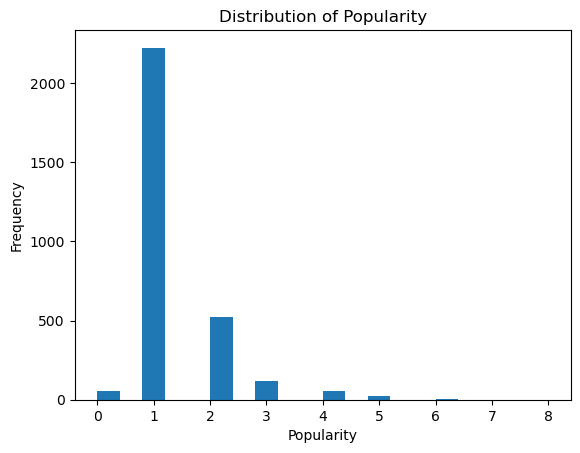

In [43]:

plt.hist(df['production_countries_num'], bins=20)  # Adjust the number of bins as desired
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

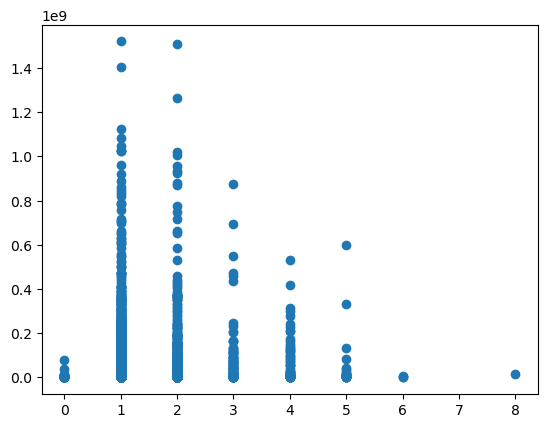

In [44]:
plt.scatter(df['production_countries_num'], df['revenue'])

In [39]:
excel_file_path = 'droped.xlsx'

# Export the DataFrame to Excel
df.to_excel(excel_file_path, index=False)